In [1]:
import sys
print(sys.executable)

C:\Users\DELL\anaconda3\python.exe


In [2]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [3]:
# import spacy
import spacy

In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
# create doc object
doc=nlp(u'Tesla is looking at buying us')
# Print each token separately
for token in doc:
    print(token.text,token.pos,token.dep_,token.lemma_)

Tesla 96 nsubj Tesla
is 87 aux be
looking 100 ROOT look
at 85 prep at
buying 100 pcomp buy
us 95 dobj we


In [6]:
spacy.__version__

'3.8.5'

In [3]:
import numpy as np
import pandas as pd

In [5]:
np.__version__

'1.26.4'

In [7]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\smsspamcollection (1).tsv", sep='\t')

In [9]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [11]:
len(df)

5572

In [13]:
df.shape

(5572, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [17]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [19]:
df.tail(5)

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [21]:
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [22]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [23]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [24]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [29]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

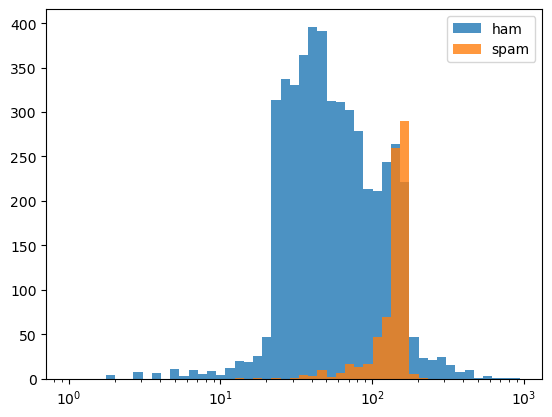

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham'] ['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam'] ['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()
              

In [32]:
# create feature and label sets
X = df[['length','punct']] # note the double set of brackets
y = df['label']

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
X_train

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3
...,...,...
3772,81,3
5191,22,2
5226,45,8
5390,26,0


In [38]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
2505,160,10
2525,99,5
4975,62,5
650,97,11


In [43]:
y_train

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
       ... 
3772    ham
5191    ham
5226    ham
5390    ham
860     ham
Name: label, Length: 3900, dtype: object

In [45]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [47]:
# fit model

In [49]:
# start with logistic regression
from sklearn.linear_model import LogisticRegression


In [51]:
lg = LogisticRegression()

In [53]:
lg.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred = lg.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
# Modelling with Support Vector Machines (Classifier)

from sklearn.svm import SVC

In [61]:
svc = SVC()

In [63]:
svc.fit(X_train,y_train)

SVC()

In [64]:
y_pred_svc = svc.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93      1448
        spam       0.58      0.17      0.26       224

    accuracy                           0.87      1672
   macro avg       0.73      0.58      0.60      1672
weighted avg       0.84      0.87      0.84      1672



In [69]:
# Modelling with Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred_dt = dt.predict(X_test)

In [77]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         ham       0.92      0.94      0.93      1448
        spam       0.55      0.46      0.50       224

    accuracy                           0.88      1672
   macro avg       0.74      0.70      0.72      1672
weighted avg       0.87      0.88      0.87      1672



In [79]:
from sklearn import metrics

In [81]:
# print the overall accuracy
print(metrics.accuracy_score(y_test,y_pred_dt))
                                            

0.8779904306220095


## Split the data into train test sets

In [84]:
from sklearn.model_selection import train_test_split

X = df['message'] # this time we want to look at the text
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## scikit-learn's CountVectorizer

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3900, 7263)

## tf/idf

In [90]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3900, 7263)

## Combine Steps with TfidVectorizer

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3900, 7263)

## Train a classifier

In [96]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

## Build pipeline

In [99]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

## Test the classifier and display results

In [102]:
predictions = text_clf.predict(X_test)

In [104]:
from sklearn import metrics

In [106]:
print(metrics.confusion_matrix(y_test,predictions))

[[1445    3]
 [  10  214]]


In [108]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [110]:
print(metrics.accuracy_score(y_test,predictions))

0.9922248803827751
